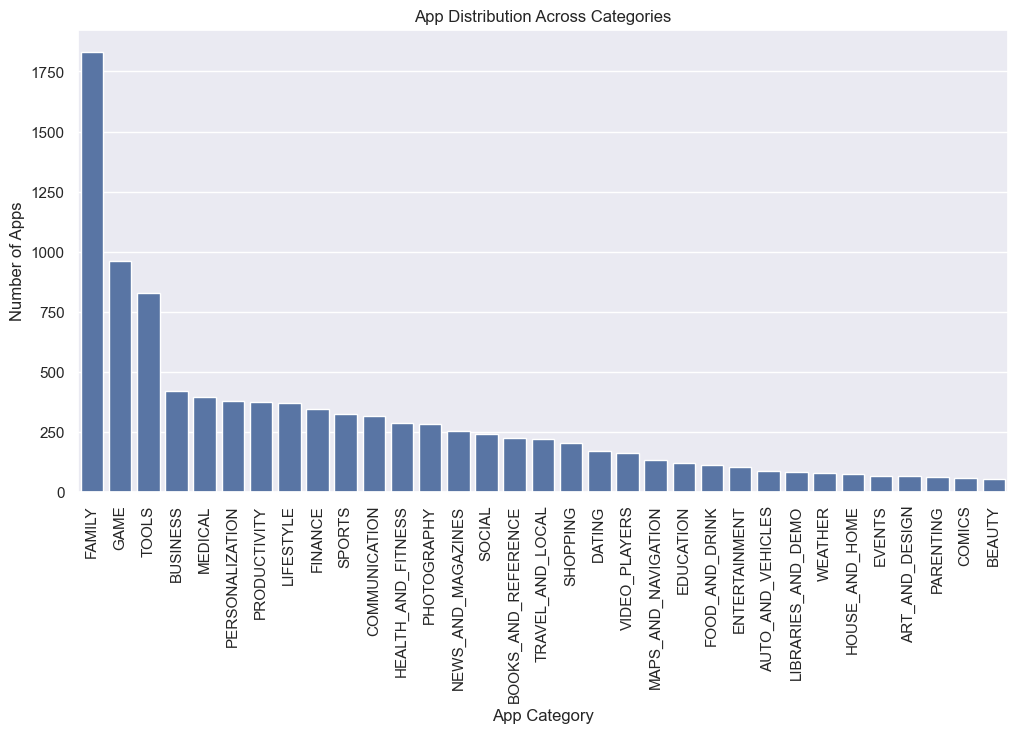

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn theme to use a colormap
sns.set_theme()

# Load your cleaned dataset
df = pd.read_csv('cleaned_dataset.csv')

# Explore app distribution across categories
category_distribution = df['Category'].value_counts()

# Plot the distribution using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=category_distribution.index, y=category_distribution.values)
plt.xticks(rotation=90)
plt.xlabel('App Category')
plt.ylabel('Number of Apps')
plt.title('App Distribution Across Categories')
plt.show()


# Metrics Analysis

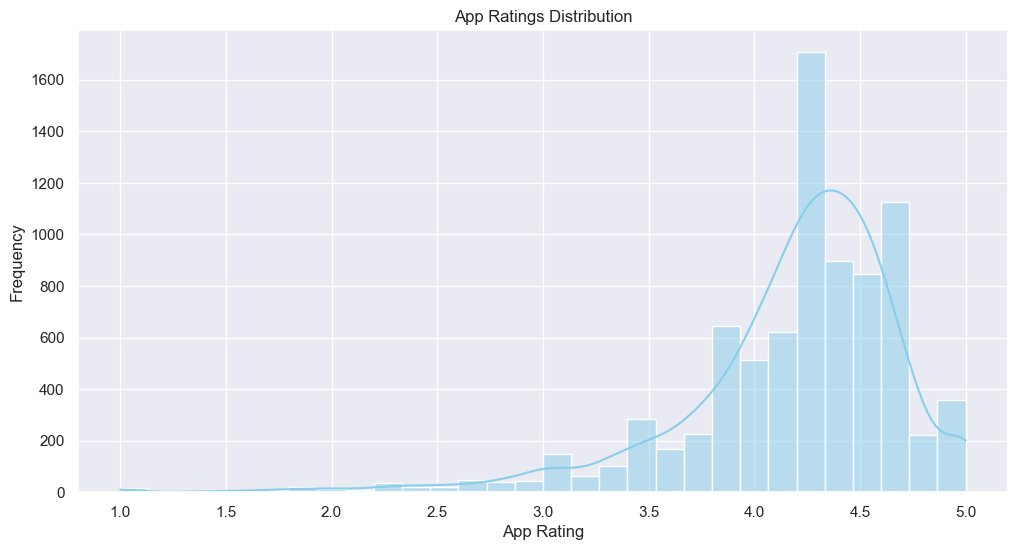

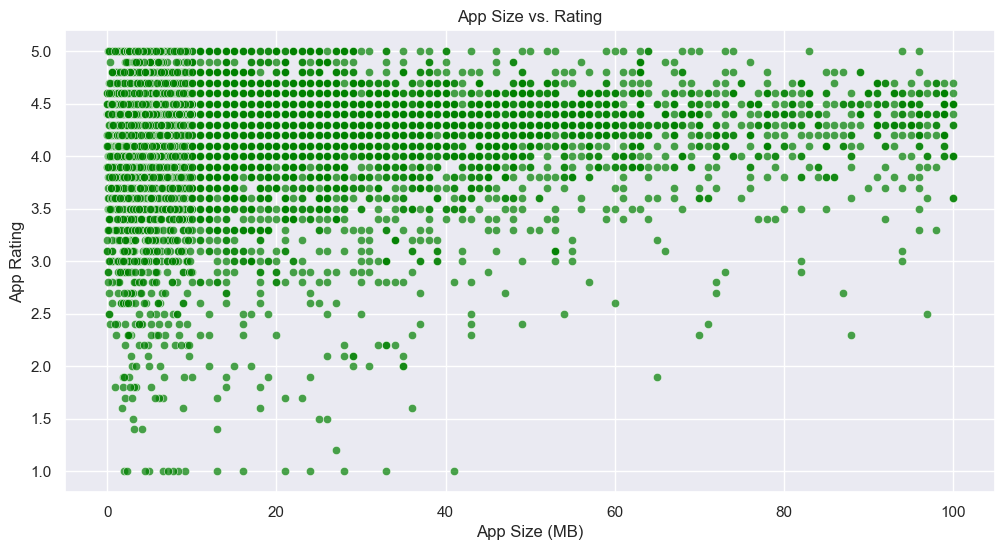

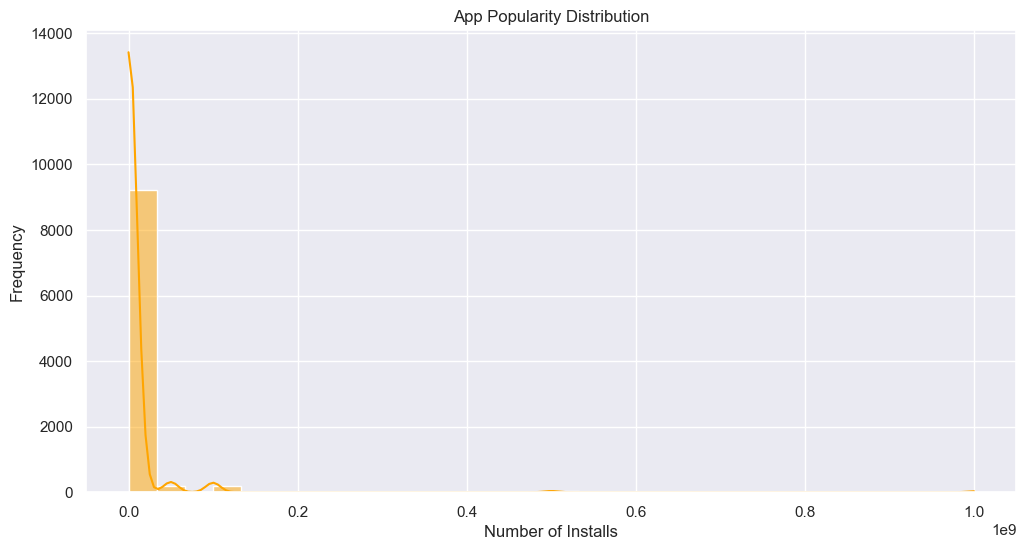

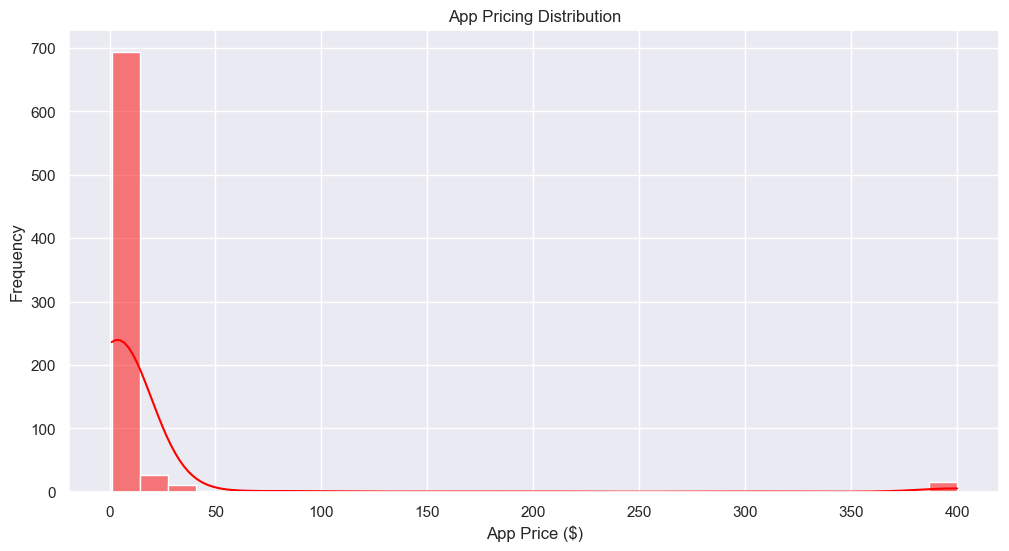

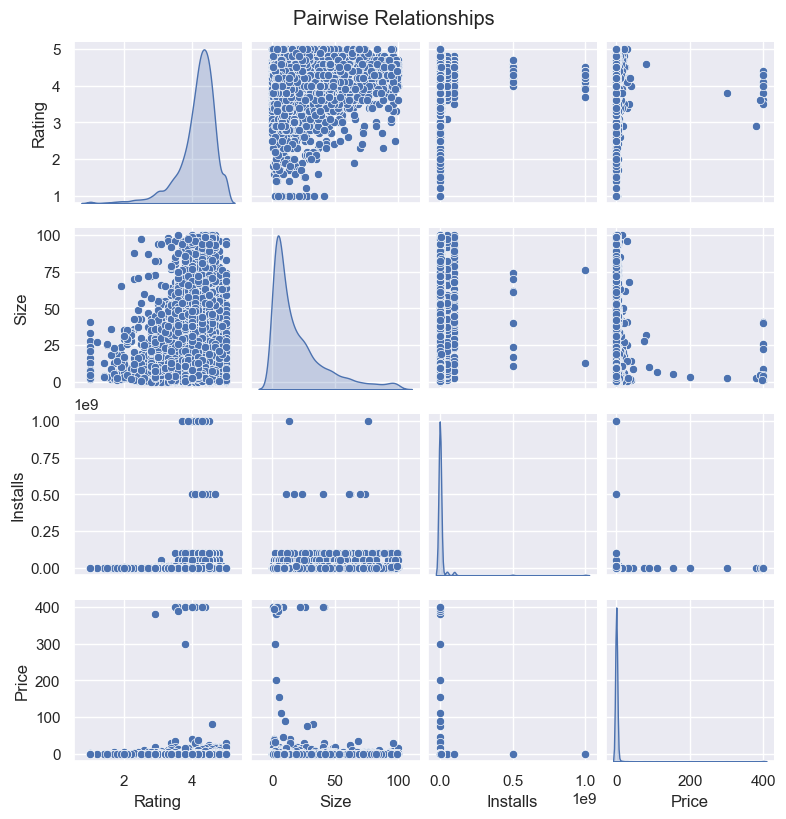

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your cleaned dataset
df = pd.read_csv('cleaned_dataset.csv')

# Metrics Analysis

# App Ratings Distribution
plt.figure(figsize=(12, 6))
sns.histplot(df['Rating'], bins=30, kde=True, color='skyblue')
plt.xlabel('App Rating')
plt.ylabel('Frequency')
plt.title('App Ratings Distribution')
plt.show()

# App Size vs. Rating
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Size', y='Rating', data=df, color='green', alpha=0.7)
plt.xlabel('App Size (MB)')
plt.ylabel('App Rating')
plt.title('App Size vs. Rating')
plt.show()

# Popularity (Installs) Distribution
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').astype(int)
plt.figure(figsize=(12, 6))
sns.histplot(df['Installs'], bins=30, kde=True, color='orange')
plt.xlabel('Number of Installs')
plt.ylabel('Frequency')
plt.title('App Popularity Distribution')
plt.show()

# Pricing Distribution
df['Price'] = df['Price'].str.replace('$', '').astype(float)
plt.figure(figsize=(12, 6))
sns.histplot(df[df['Price'] > 0]['Price'], bins=30, kde=True, color='red')
plt.xlabel('App Price ($)')
plt.ylabel('Frequency')
plt.title('App Pricing Distribution')
plt.show()

# Pairwise Relationships
sns.pairplot(df[['Rating', 'Size', 'Installs', 'Price']], diag_kind='kde', height=2)
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()


# Sentiment Analysis

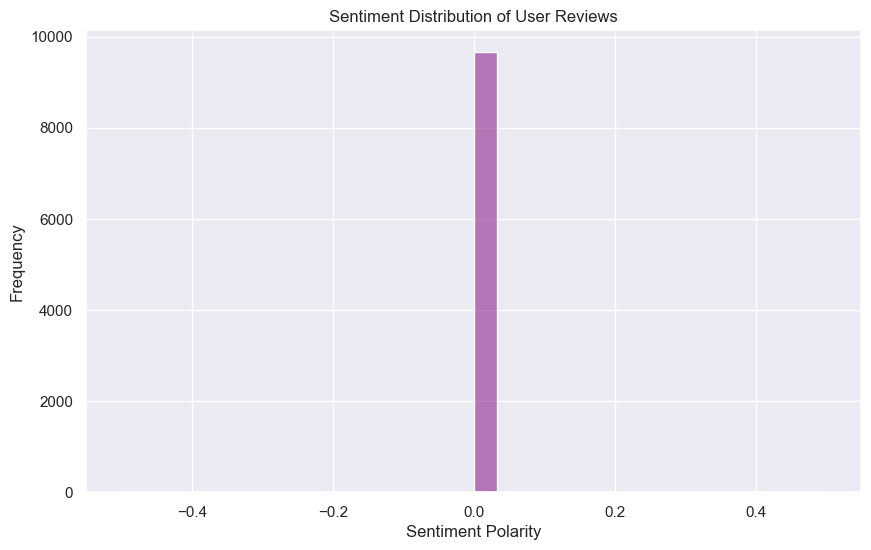

Number of Positive Reviews: 0
Number of Neutral Reviews: 9659
Number of Negative Reviews: 0


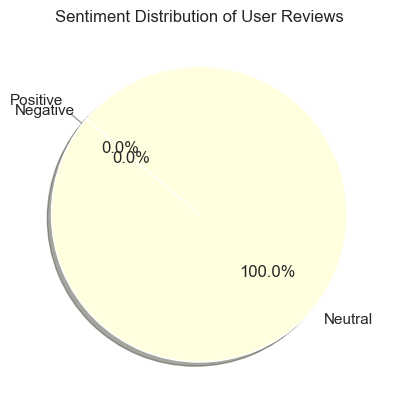

In [12]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

# Load your cleaned dataset
df = pd.read_csv('cleaned_dataset.csv')

# Assuming you have a 'Reviews' column in your dataset

# Perform sentiment analysis using TextBlob
df['Sentiment'] = df['Reviews'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Plot Sentiment Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Sentiment'], bins=30, kde=True, color='purple')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution of User Reviews')
plt.show()

# Analyze Positive, Neutral, and Negative Sentiments
positive_reviews = df[df['Sentiment'] > 0]
neutral_reviews = df[df['Sentiment'] == 0]
negative_reviews = df[df['Sentiment'] < 0]

print(f"Number of Positive Reviews: {len(positive_reviews)}")
print(f"Number of Neutral Reviews: {len(neutral_reviews)}")
print(f"Number of Negative Reviews: {len(negative_reviews)}")

# Plot Pie Chart for Sentiment Distribution
labels = 'Positive', 'Neutral', 'Negative'
sizes = [len(positive_reviews), len(neutral_reviews), len(negative_reviews)]
colors = ['lightgreen', 'lightyellow', 'lightcoral']
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Sentiment Distribution of User Reviews')
plt.show()


# Visualizations

In [15]:
import pandas as pd
import plotly.express as px

# Load your cleaned dataset
df = pd.read_csv('cleaned_dataset.csv')

# Assuming you have 'Rating', 'Installs', and 'Reviews' columns in your dataset

# Clean the data by dropping rows with NaN values in 'Rating' and 'Size'
df_cleaned = df.dropna(subset=['Rating', 'Size'])

# Create an interactive scatter plot with tooltips
fig = px.scatter(df_cleaned, x='Installs', y='Reviews', color='Rating', size='Rating',
                 hover_data=['App'], title='Interactive Scatter Plot',
                 labels={'Installs': 'Number of Installs', 'Reviews': 'Number of Reviews'})

# Show tooltips with additional information
fig.update_traces(text=df_cleaned['App'])

# Show the interactive plot
fig.show()
